<a href="https://colab.research.google.com/github/iashyam/Machine-Learning-First-Repo/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

In [ ]:
# read the data and exploratory visualisation
data = pd.read_csv("fashion-mnist_train.csv")

In [3]:
data.shape

(60000, 785)

In [4]:
data.isna().sum().sum()

0

So there are no missing values.

In [5]:
#separating the label and images
labels = data['label']
images = data.drop('label', axis=1)

In [6]:
images = images.values.reshape(60000, 28, 28, 1)

In [7]:
#visualizing images
def visualize_images(images, labels):
    plt.imshow(images[:,:,0], cmap='gray')
    plt.title(f"Label: {labels}")
    plt.axis('off')
    plt.show()

In [8]:
labels_name ={0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

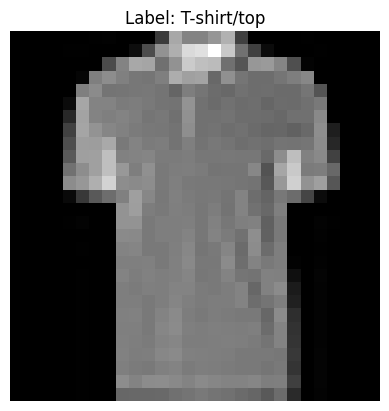

In [9]:
index = np.random.randint(0, 60000)
visualize_images(images[index], labels_name[labels[index]])

In [10]:
#distributaion of labels
labels.value_counts()

,count
label,
2,6000
9,6000
6,6000
0,6000
3,6000
4,6000
5,6000
8,6000
7,6000


In [11]:
#splitting into train and test sets
train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size=0.1, random_state=42)

## Making the Neural Nework

In [15]:
def make_net(n_input:tuple, n_output:int):

    model = Sequential()

    #first convulational layer
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=n_input))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #second convulation layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))


    #flatten layer
    model.add(Flatten())

    #dense layer
    model.add(Dense(units=128, activation='relu'))

    #output layer
    model.add(Dense(units=n_output, activation='softmax'))

    return model

def compile_net(model):
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def train_net(model, epoch:int, batch_size:int, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(x_test, y_test))
    return history

In [16]:
input_shape = train_x.shape[1:]
output_shape = labels.nunique()

model = make_net(input_shape, output_shape)
compile_net(model)



In [17]:
history = train_net(model, 15, 256, train_x, train_y, test_x, test_y)

Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 66s 301ms/step - accuracy: 0.5431 - loss: 5.6413 - val_accuracy: 0.7818 - val_loss: 0.5885
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 85s 316ms/step - accuracy: 0.7862 - loss: 0.5740 - val_accuracy: 0.8247 - val_loss: 0.4608
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 82s 316ms/step - accuracy: 0.8246 - loss: 0.4679 - val_accuracy: 0.8408 - val_loss: 0.4107
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 91s 434ms/step - accuracy: 0.8456 - loss: 0.4152 - val_accuracy: 0.8530 - val_loss: 0.3832
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 115s 306ms/step - accuracy: 0.8636 - loss: 0.3683 - val_accuracy: 0.8565 - val_loss: 0.3613
Epoch 6/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 82s 306ms/step - accuracy: 0.8751 - loss: 0.3398 - val_accuracy: 0.8810 - val_loss: 0.3150
Epoch 7/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 83s 313ms/step - accuracy: 0.8866 - loss: 0.3059 - val_accuracy: 0.8818 - val_loss: 0.3170
Epoch 8/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 67s 318ms/step - accuracy: 0.8891 - loss: 

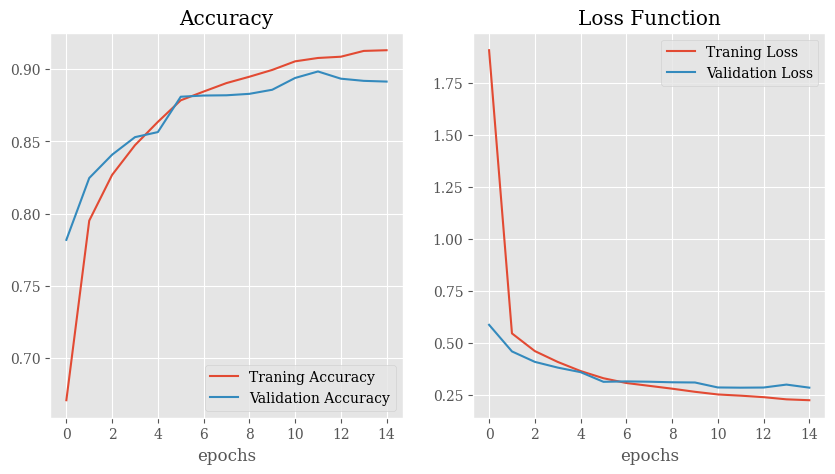

In [51]:
#plot traning and validation loss and accuracyp
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Traning Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.title('Accuracy')
plt.legend()
plt.style.use('ggplot')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Traning Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.title('Loss Function')
plt.legend();

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


Text(50.722222222222214, 0.5, 'True')

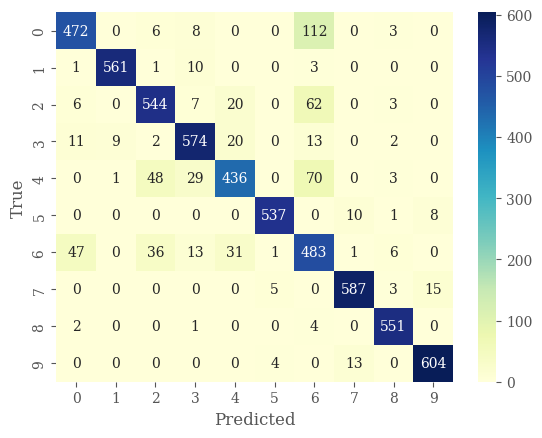

In [56]:
prediction = model.predict(test_x)
prediction = np.argmax(prediction, axis=1)

#plot the confusion matrix
cm = confusion_matrix(test_y, prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')

In [61]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       601
           1       0.98      0.97      0.98       576
           2       0.85      0.85      0.85       642
           3       0.89      0.91      0.90       631
           4       0.86      0.74      0.80       587
           5       0.98      0.97      0.97       556
           6       0.65      0.78      0.71       618
           7       0.96      0.96      0.96       610
           8       0.96      0.99      0.98       558
           9       0.96      0.97      0.97       621

    accuracy                           0.89      6000
   macro avg       0.90      0.89      0.89      6000
weighted avg       0.90      0.89      0.89      6000

